# 모듈 

In [1]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 719 kB 6.8 MB/s 
     |████████████████████████████████| 4.4 MB 40.2 MB/s 
     |████████████████████████████████| 365 kB 46.6 MB/s 
     |████████████████████████████████| 1.2 MB 52.4 MB/s 
     |████████████████████████████████| 212 kB 55.5 MB/s 
     |████████████████████████████████| 101 kB 13.0 MB/s 
     |████████████████████████████████| 1.1 MB 38.8 MB/s 
     |████████████████████████████████| 140 kB 53.2 MB/s 
     |████████████████████████████████| 596 kB 48.5 MB/s 
     |████████████████████████████████| 127 kB 51.0 MB/s 
     |████████████████████████████████| 271 kB 76.8 MB/s 
     |████████████████████████████████| 94 kB 2.6 MB/s 
     |████████████████████████████████| 144 kB 76.1 MB/s 
     |████████████████████████████████| 6.6 MB 50.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10

In [2]:
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

# 데이터 배열화


In [3]:
# MNIST Dataset download

path = untar_data(URLs.MNIST_SAMPLE)

In [4]:
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/train'),Path('/root/.fastai/data/mnist_sample/valid'),Path('/root/.fastai/data/mnist_sample/labels.csv')]

In [5]:
(path/'train').ls()

(#2) [Path('/root/.fastai/data/mnist_sample/train/7'),Path('/root/.fastai/data/mnist_sample/train/3')]

In [6]:
threes =(path/'train'/'3').ls().sorted()
sevens =(path/'train'/'7').ls().sorted()
threes

(#6131) [Path('/root/.fastai/data/mnist_sample/train/3/10.png'),Path('/root/.fastai/data/mnist_sample/train/3/10000.png'),Path('/root/.fastai/data/mnist_sample/train/3/10011.png'),Path('/root/.fastai/data/mnist_sample/train/3/10031.png'),Path('/root/.fastai/data/mnist_sample/train/3/10034.png'),Path('/root/.fastai/data/mnist_sample/train/3/10042.png'),Path('/root/.fastai/data/mnist_sample/train/3/10052.png'),Path('/root/.fastai/data/mnist_sample/train/3/1007.png'),Path('/root/.fastai/data/mnist_sample/train/3/10074.png'),Path('/root/.fastai/data/mnist_sample/train/3/10091.png')...]

In [7]:
im3_path = threes[1]
im3 = Image.open(im3_path) # Image.open => PIL library
im3

In [8]:
# 넘파이의 배열을 사용하여 숫자를 확인하거나,
array(im3)[4:10, 4:10]

# pytorch의 tensor을 사용한다.
tensor(im3)[4:10, 4:10]

# 이때 숫자는 0 ~ 255까지 채도? 명도? 를 나타낸다.

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [9]:
# pandas 라이브러리를 통해 픽셀값에 맞춰 잘라낸 후 색상을 그라데이션 형태로 입힌다.
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15, 4:22])
df.style.set_properties(**{'font-size' : '6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [10]:
# 모든 자료들을 텐서로 저장
# * 리스트 컴프리헨션 학습 할 것
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(seven_tensors), len(three_tensors)

(6265, 6131)

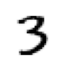

In [11]:
# 이미지 출력
show_image(three_tensors[1]) # PIL library?

In [12]:
# 스택과 동시에 부동소수로 표현
stacked_threes = torch.stack(three_tensors).float()/255
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes.shape 
# shape는 축의 크기, rank 는 축의 갯수

torch.Size([6131, 28, 28])

In [13]:
stacked_threes.ndim
# 3차원 형태

3

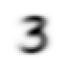

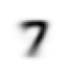

In [14]:
# 쌓아 올린 텐서들을 가지고 해당 픽셀의 평균값을 구한 뒤 하나의 이미지로 새롭게 정의한다.

# 모든 3의 픽셀값에 따른 평균 이미지 재해석
mean3 = stacked_threes.mean(0) # <- 왜 함수의 인자로 0이 들어가는가? 1, 2, -1 다 안됨
show_image(mean3)

# 모든 7의 텐서의 픽셀값에 따른 평균 이미지 재해석
mean7 = stacked_sevens.mean(0)
show_image(mean7)

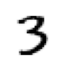

In [15]:
# 차이의 절댓값에 대한 평균 : L1 노름, 평균절대차
# 차이의 제곱에 대한 절댓값 후 제곱근 : L2 노름, 평균제곱근오차

a_3 = stacked_threes[1]
show_image(a_3)

In [16]:
dist_3_abs = (a_3 - mean3).abs().mean() # absolute
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt() # squared
dist_3_abs, dist_3_sqr

# (tensor(0.1114), tensor(0.2021))

dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
dist_7_abs, dist_7_sqr

# (tensor(0.1586), tensor(0.3021))

(tensor(0.1586), tensor(0.3021))

In [17]:
# 손실함수로 표현하는 방법

F.l1_loss(a_3.float(), mean7), F.mse_loss(a_3, mean7).sqrt()

# l1 손실함수, 평균제곱오차(mean squared error)에서 제곱근 사용

(tensor(0.1586), tensor(0.3021))

# difference between tensor and numpy

* 기본적으로 numpy는 c언어를 기반으로 만들어졌기 때문에 다양한 형태의 데이터를 담을 수 있고, 자료형만 같다면 다양한 모습으로 연산을 통해 배열을 만들 수 있다.

* numpy는 연산을 압축하여 메모리에 저장하기에 매우 빠른 속도를 자랑한다.

* tensor는 수치형 데이터만 사용할 수 있으며, 다양한 모습으로 변할 수 없어 항상 사각형을 유지해야 한다.

* 단, GPU에 연산을 맡길 수 있어 수 많은 양에 대한 연산이 매우 빠르게 적용하고, 자동으로 미분을 해주기도 한다.

In [18]:
data = [[12, 35, 32], [10, 39, 20]]
arr = array(data)
tns = tensor(data)

arr 
# array([[12, 35, 32], [10, 39, 20]])

tns
# tensor([[12, 35, 32], [10, 39, 20]])

tensor([[12, 35, 32],
        [10, 39, 20]])

In [19]:
# tns[행 : 열]
tns[1] # tensor([10, 39, 20]) : 인덱스 1에 해당되는 행을 들고온다. 2행

tns[:, 0] # tensor([12, 10]) : 인덱스 0에 해당되는 열을 들고온다. 모든 행에 대한 1열

tensor([12, 10])

In [20]:
tns.type() # torch.LongTensor

# 자동으로 정수형에서 부동소수로
tns = tns * 1.5
tns.type() # torch.FloatTensor

'torch.FloatTensor'

# calculate rate through broadcasting

* 학습용 데이터 셋에서만 잘 작동하는 overfit을 피하기 위해 검증용 데이터셋을 사용한다.

* 보통 정확도(accuracy)를 분류 평가지표로 사용한다.

In [21]:
# MNIST 에는 검증용 데이터셋이 따로 분류되어있다. Path('/root/.fastai/data/mnist_sample/valid')

valid_3_tens = torch.stack([tensor(Image.open(o))
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255

valid_7_tens = torch.stack([tensor(Image.open(o))
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_3_tens.float()/255

valid_3_tens.shape, valid_7_tens.shape

# (torch.Size([1010, 28, 28]), torch.Size([1010, 28, 28]))

(torch.Size([1010, 28, 28]), torch.Size([1010, 28, 28]))

In [22]:
# 평균절대오차를 계산하는 함수

def mnist_distance(a,b) : return (a-b).abs().mean((-1, -2)) # 왜 평균에 인자를 넣어주면 브로드캐스팅이 되는가?
mnist_distance(a_3, mean3)

tensor(0.1114)

In [23]:
valid_3_dist = mnist_distance(valid_3_tens, mean3) # 검증용 데이터와 3의 평균이미지와의 오차를 구해 계산
valid_3_dist, valid_3_dist.shape

# len(valid_3_dist) == 1010

# 여기서 valid_3_tens는 rank-3에 해당되는데 mean3 는 rank-2의 테이블 형식이다.
# mnist_distance에서 텐서 간의 격차인 (a-b)에서 broadcasting이 일어난 걸 알 수 있다.

(tensor([0.1248, 0.1410, 0.1222,  ..., 0.1126, 0.1045, 0.1123]),
 torch.Size([1010]))

In [24]:
# 브로드캐스팅이란?

# numpy에서는 차원과 비슷한 개념인데 3차원과 2차원이 연산이 될 때 자동으로 2차원이 3차원으로 변형되면서 연산이 가능해지도록 해주는
# 한 마디로 자동차원(rank)변환

tensor([1,2,3]) + tensor(1) # rank-2의 테이블과 rank-1의 텐서에서 텐서가 자동으로 테이블로 조정되어 연산이 실행되었다.

tensor([2, 3, 4])

In [25]:
# mean3가 1010개 추가된 것처럼 보이지민 실제로 메모리가 할당되진 않는다.
(valid_3_tens - mean3).shape

torch.Size([1010, 28, 28])

In [26]:
# mean()은 그 픽셀별 뺀 값의 평균을 구해준다.

def abso(a,b) : return (a-b).abs()

image1 = abso(valid_3_tens[10], mean7)
df = pd.DataFrame(image1)
df.style.set_properties(**{'font-size' : '6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000063,0.000120,0.000084,0.000016,0.000032,0.000040,0.000024,0.152941,0.631143,0.995715,0.995696,0.995741,0.642919,0.160664,0.000001,0.000000,0.000000,0.000000,0.000159,0.000031,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000093,0.000342,0.001185,0.002433,0.004050,0.006239,0.148544,0.881368,0.982636,0.981902,0.982578,0.983364,0.983993,0.557765,0.004937,0.003501,0.001519,0.000690,0.000536,0.000295,0.000001,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000513,0.001144,0.004512,0.012454,0.023687,0.037022,0.054341,0.261944,0.903298,0.892861,0.547689,0.447410,0.760316,0.883386,0.733638,0.096178,0.079079,0.058155,0.037206,0.022864,0.011055,0.003341,0.000456,0.000011,0.000000,0.000000
7,0.000029,0.000424,0.003263,0.010402,0.028360,0.059792,0.104739,0.157012,0.214893,0.245453,0.174061,0.187591,0.372992,0.197501,0.547959,0.558453,0.401654,0.422286,0.375021,0.303385,0.210314,0.121410,0.058161,0.023271,0.004755,0.000730,0.000000,0.000000
8,0.000120,0.001743,0.011414,0.033500,0.070653,0.132629,0.211860,0.311085,0.411384,0.508958,0.591020,0.649767,0.687151,0.014236,0.275513,0.266571,0.167366,0.000724,0.073009,0.170848,0.366640,0.217183,0.105576,0.040372,0.009248,0.001138,0.000000,0.000000
9,0.000183,0.002802,0.018204,0.050405,0.101714,0.179732,0.278085,0.395733,0.510971,0.612353,0.681796,0.718202,0.049727,0.256089,0.294869,0.284848,0.252078,0.223965,0.251808,0.360430,0.143643,0.092392,0.122494,0.042672,0.008554,0.001276,0.000098,0.000128


In [27]:
# mean() 에 인자로 (-1,-2)의 튜플을 넣어주는 이유는 특정 위치의 평균만을 구하고 싶을 때 사용한다.
# tensor의 shape는 대게 [1, 40, 40] 이런 식인데 -1, -2의 인덱싱을 통해 가로 세로의 값들만 가지고 평균을 구할 때 사용한다.
# 즉 가로 세로를 가지고 구하는 값은 단 rank-1의 텐서를 가지며 이러한 텐서가 stack된 1010개를 가지고 있다. 그래서 텐서의 크기가 (1010)인 이유다.

In [28]:
# 특정 숫자의 이미지와 이상적인 숫자의 거리가 짧다면 그 숫자가 동일하다는 판단하는 함수를 가지고 학습한다.
def is_3(x): return mnist_distance(x, mean3) < mnist_distance(x, mean7) 


# 위 함수는 x에 특정 숫자를 넣었을 때 3과의 차이가 7보다 적다면(3과 거의 동일시) True를 반환한다.

is_3(valid_3_tens[10]) # True
is_3(valid_3_tens).float() # tensor([1., 1., 1.,  ..., 1., 1., 1.]) True면 1을 반환 False는 0을 반환
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean() # 1.0 == 100% 맞다..

accuracy_7s, accuracy_3s, (accuracy_7s + accuracy_3s) /2 

(tensor(1.), tensor(0.9168), tensor(0.9584))

# stochastic gradient descent 확률적 경사하강법

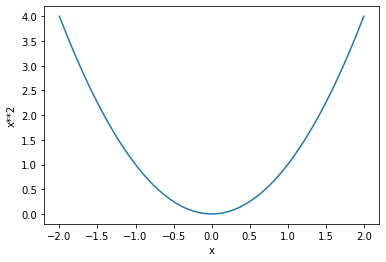

In [29]:
def f(x) : return x**2

plot_function(f, 'x', 'x**2') # function을 가지고 그래프를 표시, 2,3번째 인자는 각각 가로 세로의 태그

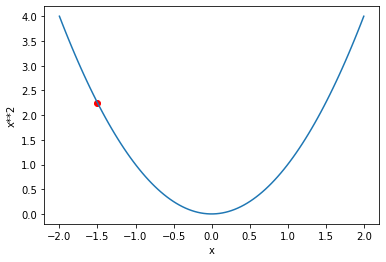

In [30]:
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color='red')

In [36]:
# 특정값의 변수에 대한 gradient를 계산해달라고 하는 함수 : requires_grad_()

xt = tensor(3.).requires_grad_() # tensor(3., requires_grad=True)

yt = f(xt)
yt.backward() # 그레디언트 계산 initialize

xt.grad

tensor(6.)

In [38]:
xt = tensor([10., 36., 25.]).requires_grad_()
xt # tensor([10., 36., 25.], requires_grad=True)

def f(x): return (x**2).sum()
yt = f(xt)
yt # 100 + 36^2 + 25^2

tensor(2021., grad_fn=<SumBackward0>)

In [39]:
# 위 예제 미분

yt.backward()
xt.grad # 기울기 2x에 값을 대입

tensor([20., 72., 50.])

4.4.2